# 1. Hierarchical Clustering
We are now going to talk about a different technique for building clustering known as: **Agglomerative Clustering**. If you have ever studied algorithms, you will recognize this as a greedy algorithm. We are going to be purposefully short sighted, and make what appears to be the best decision at the time.

The basic idea looks something like this:
> * **Start with a set of points**
* **Merge the 2 closest**
* **Repeat until you only have 1 group of all the points**

## 1.1 Agglomerative Clustering 

An awesome video to help explain this can be seen <a href="https://www.youtube.com/watch?v=XJ3194AmH40">here</a>.

In order to work with the outcome of agglomerative clustering, we can use what is referred to as a **dendrogram**. In a dendrogram, the height of a cluster *(A,B)* is proportional to the height of the line that joins $A$ and $B$. 

## 1.2 How to calculate distance?
So far, we have assumed that we are using **Euclidean Distance** are our measure of the closeness of the clusters. However, this does not need to be the case. There are other methods that can be used as well, seen <a href="https://numerics.mathdotnet.com/distance.html">here</a>. Note, there are certain things that make a distance valid, which are discussed more <a href="https://en.wikipedia.org/wiki/Metric_(mathematics)">here</a>.

## 1.3 How do we join clusters together?
Since we did have not gone too in depth regarding hierarchical clustering, we still don't fully know how to define the distance between 2 clusters. We have several options:

> * **The mean distance between two clusters**
* **The distance between the 2 closest cluster points**
* **The distance between the 2 furthest cluster points**

<img src="images/linkages.jpg">

### 1.3.1 Single-Linkage
This is where we look at each point in cluster 1, and find the closest point in cluster 2. This looks like:
> `d(clusterA, clusterB) = min distance between any 2 points, 1 from A, 1 from B`

The pseudocode may look something like this:

**Pseudocode**<br>
```
min_dist = Infinity
for p1 in cluster1:
    for p2 in cluster2:
        min_dist = min( d(p1, p2), min_dist)
```

A down side to this method is that we may get something called **the chaining effect**. This is where we just keep choosing the thing beside our current cluster. However, we end up choosing something where the total points end up very far apart. 

### 1.3.2 Complete-Linkage
The opposite of single linkage clustering is **complete linkage clustering**. This is where we look at each point in cluster 1, and find the furthest point in cluster 2. This looks like:

> `d(clusterA, clusterB) = max distance between any 2 points, 1 from A, 1 from B`

The pseudocode may look something like this:

**Pseudocode**<br>
```
max_dist = Infinity
for p1 in cluster1:
    for p2 in cluster2:
        min_dist = max( d(p1, p2), max_dist)
```

### 1.3.3 Mean Distance
The third type of clustering, which is probably the most intuitive, is to just take the mean distance. 

**Pseudocode**<br>
```
dist = 0
for p1 in cluster1:
    for p2 in cluster2:
        dist += d(p1, p2)
    dist = dist / (len(cluster1)*len(cluster2))
```

# 2. Hierarchical Clustering in Code
We are now going to look at hierarchical clustering in code. We won't be writing the code ourselves, but instead will be using a library and exploring what it can do. 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Z shape (899, 4)


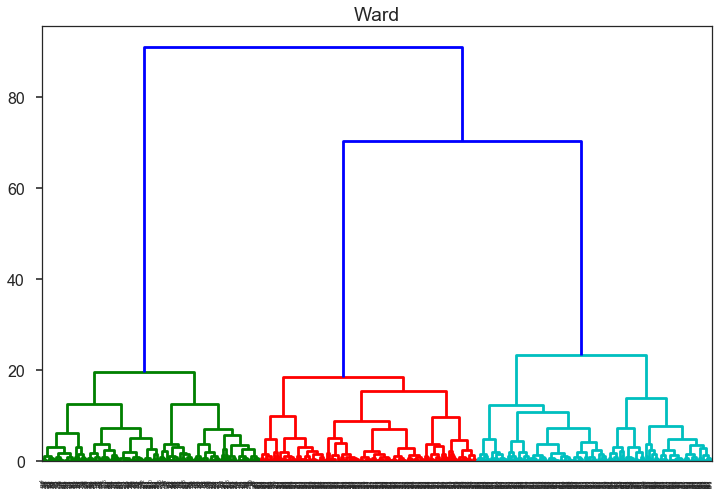

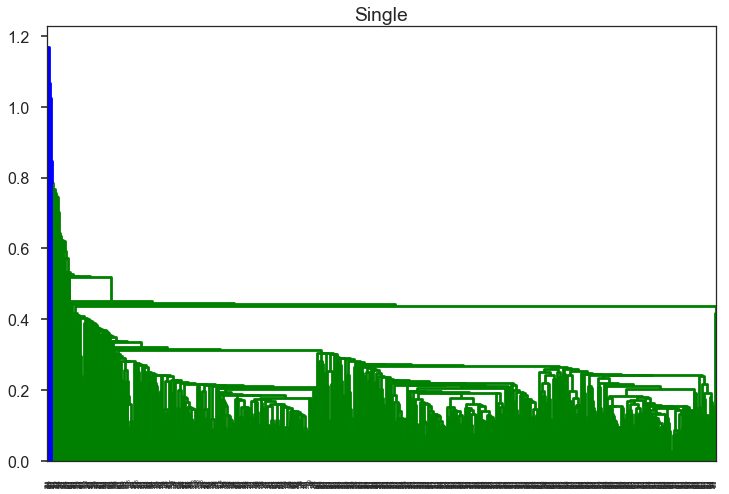

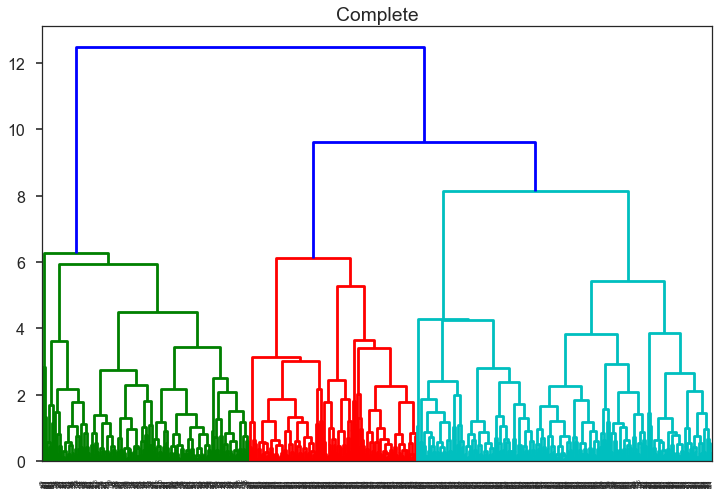

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

%matplotlib inline

# New imports, specific to this example
from scipy.cluster.hierarchy import dendrogram, linkage

def main():
  D = 2                     # Dimensionality
  s = 4                     # Separation so we can control how far apart the means are
  mu1 = np.array([0, 0])
  mu2 = np.array([s, s])
  mu3 = np.array([0, s])
  
  N = 900                   # Number of samples
  X = np.zeros((N, D))
  X[:300, :] = np.random.randn(300, D) + mu1
  X[300:600, :] = np.random.randn(300, D) + mu2
  X[600:, :] = np.random.randn(300, D) + mu3
  
  # Call linkage on X, pass in parameter telling what type of linkage to use
  Z = linkage(X, 'ward')
  # In general, Z will have format index1, index2 for two index's in X that represent the 
  # points that are joined at that moment. The third column will be the distance, which is 
  # how far apart the two clusters were before being joined, and the 4th column will be 
  # sample count, which is the number of points in that cluster. Hence, the size of Z will
  # be ((N - 1) x 4)
  print("Z shape", Z.shape)
  
  fig, ax = plt.subplots(figsize=(12,8))
  plt.title("Ward")
  dendrogram(Z)      # Call dendrogram on Z
  plt.show()
  
  # Now do single linkage for a different example
  fig, ax = plt.subplots(figsize=(12,8))
  Z = linkage(X, 'single')
  plt.title("Single")
  dendrogram(Z)
  plt.show()
  
  # And one more for complete
  fig, ax = plt.subplots(figsize=(12,8))
  Z = linkage(X, 'complete')
  plt.title("Complete")
  dendrogram(Z)
  plt.show()
  
  
if __name__ == '__main__':
  main()

We can clearly see that there are 3 natural clusters occuring! We have the chaining effect happening in the **single linkage** scenario. Clearly, **ward linkage** was the most effective. 